# Titanic: Machine Learning from Disaster

Description of the challenge [here](https://www.kaggle.com/c/titanic).

Our data is in .csv format. Each row represents a passenger on the titanic, and some information about them. Let's take a look at the columns:

 - PassengerId -- A numerical id assigned to each passenger.
 - Survived -- Whether the passenger survived (1), or didn't (0). We'll be making predictions for this column.
 - Pclass -- The class the passenger was in -- first class (1), second class (2), or third class (3).
 - Name -- the name of the passenger.
 - Sex -- The gender of the passenger -- male or female.
 - Age -- The age of the passenger. Fractional.
 - SibSp -- The number of siblings and spouses the passenger had on board.
 - Parch -- The number of parents and children the passenger had on board.
 - Ticket -- The ticket number of the passenger.
 - Fare -- How much the passenger paid for the ticker.
 - Cabin -- Which cabin the passenger was in.
 - Embarked -- Where the passenger boarded the Titanic.
 
A good first step is to think logically about the columns and what we're trying to predict. What variables might logically affect the outcome of survived? (reading more about the titanic might help here).

**Exercise.** Discuss which variables are more likely to have had an impact on the survival odds of the passengers. 

## Looking at the data

Using your recent knowledge of pandas, load the train data into a dataframe and perform some first basic exploratory operations on it to make yourself aquainted with its features.

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
titanic = pd.read_csv('data/titanic_train.csv')

titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [3]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


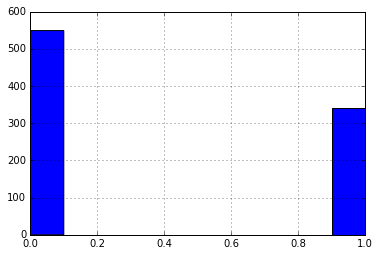

In [4]:
titanic.Survived.hist()

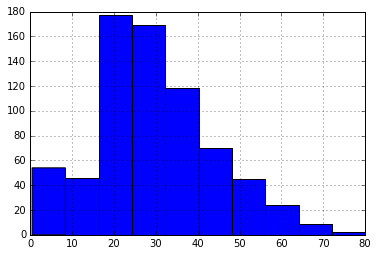

In [5]:
titanic.Age.hist()

In [6]:
titanic.groupby('Sex')[['Survived']].agg('count')

,Survived
Sex,
female,314
male,577


In [7]:
titanic.groupby(['Sex', 'Survived']).agg('count')

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   64     81     81      81    81   
       1                 233     233   233  197    233    233     233   233   
male   0                 468     468   468  360    468    468     468   468   
       1                 109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0             6        81  
       1            91       231  
male   0            62       468  
       1            45       109

## Handling missing data

You might have noticed that not every field for all of the records contains data. This means that we will need to deal with handling missing data. There are many strategies for cleaning up missing data, but a simple one is to just fill in all the missing values with the median of all the values in the column. (Question: why the median and not the average?)

Implement a solution to handle missing data on the Titanic dataframe.

In [8]:
# This fills all missing values with the median
#titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [9]:
# This is a bit more elaborated and fills with the median per group, defined as Title
titanic['Title'] = titanic.apply(lambda x: x['Name'].split(',')[1].strip().split('.')[0], axis=1)

In [10]:
titanic.groupby('Title')['Title'].agg('count')

Title
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
Name: Title, dtype: int64

In [11]:
titanic[(~titanic.Age.isnull()) & (titanic.Title=='Master')].Age.median()

3.5

In [12]:
often_titles = ['Master', 'Miss', 'Mr', 'Mrs']
titanic[(~titanic.Age.isnull()) & (~titanic.Title.isin(often_titles))].Age.median()

44.5

In [13]:
titanic.Age.median()

28.0

In [14]:
def assign_age(title):
    often_titles = ['Master', 'Miss', 'Mr', 'Mrs']
    if title in often_titles:
        median_age_title = titanic[(~titanic.Age.isnull()) & (titanic.Title==title)].Age.median()
    else:
        median_age_title = titanic[(~titanic.Age.isnull()) & (~titanic.Title.isin(often_titles))].Age.median()
    return median_age_title

In [15]:
titanic['Age'] = titanic['Age'].fillna(titanic.apply(lambda x: assign_age(x['Title']), axis=1))

In [16]:
titanic.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,30,0,0,330877,8.4583,NaN,Q,Mr


## Non-numeric columns

Several of our columns are non-numeric, which is a problem when it comes time to make predictions -- we can't feed non-numeric columns into a machine learning algorithm and expect it to make sense of them.

We have to either exclude our non-numeric columns when we train our algorithm (Name, Sex, Cabin, Embarked, and Ticket), or find a way to convert them to numeric columns.

Decide which non-numeric columns to keep for the analysis, based on your domain knowledge of the problem. Then, turn them into numeric values (categorical variables).

In [17]:
# Sex
# Check that Sex column is complete
# titanic[titanic.Sex.isnull()]
titanic['Sex'] = titanic.apply(lambda x: 1 if x.Sex=='female' else 0, axis=1)

In [18]:
# Embarked (C = Cherbourg; Q = Queenstown; S = Southampton)
titanic[titanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",1,38,0,0,113572,80,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62,0,0,113572,80,B28,NaN,Mrs


In [19]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
# Fill the missing values with the most common Embarked
titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [21]:
dd = {'S': 0, 'C': 1, 'Q': 2}
titanic['Embarked'] = titanic.apply(lambda x: dd[x.Embarked], axis=1)

In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0,Mr


## Cross validation

We want to train the algorithm on different data than we make predictions on. This is critical if we want to avoid overfitting. Overfitting is what happens when a model fits itself to "noise", not signal. Every dataset has its own quirks that don't exist in the full population. For example, if I asked you to predict the top speed of a car from its horsepower and other characteristics, and gave you a dataset that randomly had cars with very high top speeds, you would create a model that overstated speed. The way to figure out if your model is doing this is to evaluate its performance on data it hasn't been trained using.

Every machine learning algorithm can overfit, although some are much less prone to it. If you evaluate your algorithm on the same dataset that you train it on, it's impossible to know if it's performing well because it overfit itself to the noise, or if it actually is a good algorithm.

Luckily, cross validation is a simple way to avoid overfitting. To cross validate, you split your data into some number of parts (or "folds"). Lets use 3 as an example. You then do this:

 - Combine the first two parts, train a model, make predictions on the third.
 - Combine the first and third parts, train a model, make predictions on the second.
 - Combine the second and third parts, train a model, make predictions on the first.

This way, we generate predictions for the whole dataset without ever evaluating accuracy on the same data we train our model using.

Familiarize yourself with cross-validation in scikit-learn reading about [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

## Applying scikit-learn ML algorithms to the Titanic dataset

 - Follow the scikit-learn API and apply the ML algorithm of your choice to a subset of the Titanic dataset.
 - Using the wrappers described [here](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation), compute cross-validated metrics for said algorithm
 - If your algorithm takes various parameters as input, consider tuning them to improve performance
 - Repeat with various algorithms and compare its performance

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
from sklearn import cross_validation

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

#kf = KFold(titanic.shape[0], n_folds=5, random_state=1)
kf = KFold(len(titanic), n_folds=5, shuffle=True)
train, test = [k for k in kf][0]
# The predictors we're using the train the algorithm.  Note how we only take the rows in the train folds.
X_train = (titanic[predictors].iloc[train,:])
# The target we're using to train the algorithm.
y_train = titanic["Survived"].iloc[train]
X_test = (titanic[predictors].iloc[test,:])
y_test = titanic["Survived"].iloc[test]

In [37]:
rf = RandomForestClassifier(n_estimators=50)

rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.79329608938547491

In [25]:
# Initialize our algorithm with the default paramters
# n_estimators is the number of trees we want to make
# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum number of samples we can have at the place where a tree branch ends (the bottom points of the tree)
alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)

scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=5)
print(scores.mean())

0.801416348114


In [26]:
#The first, and easiest, thing we can do to improve the accuracy of the random forest is to increase 
# the number of trees we're using. Training more trees will take more time, but because of the fact 
# that we're averaging many predictions made on different subsets of the data, having more trees will 
#increase accuracy greatly (up to a point).

#We can also tweak the min_samples_split and min_samples_leaf variables to reduce overfitting. 
#Because of how a decision tree works (as we explained in the video), having splits that go all the way down, 
#or overly deep in the tree can result in fitting to quirks in the dataset, and not true signal. 
#Thus, increasing min_samples_split and min_samples_leaf can reduce overfitting, which will actually 
#improve our score, as we're making predictions on unseen data. A model that is less overfit, 
#and that can generalize better, will actually perform better on unseen data, but worse on seen data.

alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=4, min_samples_leaf=2)

scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=3)
print(scores.mean())

0.827160493827


In [27]:
from sklearn.linear_model import LogisticRegression

# Initialize our algorithm
alg = LogisticRegression(random_state=1)
# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=3)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.791245791246


## Generating new features

If your data is rich, sometimes new features can be extracted from it that can better inform your machine learning algorithm. You can try generating new features from the name of the passengers, the members of their families present, etc.

## Finding the best features

Feature engineering is the most important part of any machine learning task, and there are lots more features we could calculate. But we also need a way to figure out which features are the best.

One way to do this is to use univariate feature selection. This essentially goes column by column, and figures out which columns correlate most closely with what we're trying to predict (Survived).

As usual, scikit-learn has a function that will help us with feature selection, [SelectKBest](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html). This selects the best features from the data, and allows us to specify how many it selects.

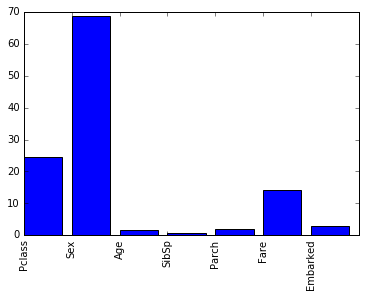

In [28]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
%matplotlib inline

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors], titanic["Survived"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

# Pick only the four best features.
predictors = ["Pclass", "Sex", "Fare", "Title"]

alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=8, min_samples_leaf=4)

In [33]:
#The first, and easiest, thing we can do to improve the accuracy of the random forest is to increase 
# the number of trees we're using. Training more trees will take more time, but because of the fact 
# that we're averaging many predictions made on different subsets of the data, having more trees will 
#increase accuracy greatly (up to a point).

#We can also tweak the min_samples_split and min_samples_leaf variables to reduce overfitting. 
#Because of how a decision tree works (as we explained in the video), having splits that go all the way down, 
#or overly deep in the tree can result in fitting to quirks in the dataset, and not true signal. 
#Thus, increasing min_samples_split and min_samples_leaf can reduce overfitting, which will actually 
#improve our score, as we're making predictions on unseen data. A model that is less overfit, 
#and that can generalize better, will actually perform better on unseen data, but worse on seen data.

alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=4, min_samples_leaf=2)

scores = cross_validation.cross_val_score(alg, titanic[['Pclass', 'Sex', 'Fare', 'Embarked']], titanic["Survived"], cv=3)
print(scores.mean())

0.795735129068


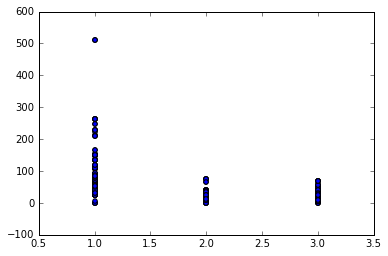

In [34]:
plt.scatter(titanic.Pclass, titanic.Fare)

In [35]:
np.corrcoef(titanic.Fare, titanic.Pclass)

array([[ 1.        , -0.54949962],
       [-0.54949962,  1.        ]])